In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [25]:
# load dataset
dataframe = pandas.read_csv('COLOR/csv/color_features_novo_32.csv')
dataframe = dataframe[dataframe.movimento != 'cubism']
# dataframe = dataframe[dataframe.movimento != 'romanti']
# dataframe = dataframe[dataframe.movimento != 'express']
dataframe = dataframe[dataframe.movimento != 'realism']
# dataset = dataframe.values
# X = dataset[:,0:4].astype(float)
# Y = dataset[:,4]
dataframe.head()

,1,2,3,4,5,6,7,8,9,10,...,664,665,666,667,668,669,670,671,672,movimento
389,0.000000,0.0,0.0,0.0,0.0,0.035446,0.000000,0.000000,0.003015,0.000000,...,0.028905,0.029418,0.063111,0.00000,0.000000,0.078940,0.072068,0.073168,0.071037,express
390,0.000000,0.0,0.0,0.0,0.0,0.014832,0.000000,0.065086,0.000110,0.000000,...,0.000000,0.000000,0.000000,0.10055,0.110930,0.000000,0.111240,0.000000,0.093423,express
391,0.028012,0.0,0.0,0.0,0.0,0.046807,0.063297,0.000000,0.000821,0.000000,...,0.000000,0.081470,0.000000,0.00000,0.024131,0.080003,0.074847,0.075988,0.000000,express
392,0.070174,0.0,0.0,0.0,0.0,0.031764,0.074514,0.000000,0.003283,0.073799,...,0.000000,0.032387,0.055486,0.06834,0.040541,0.046677,0.060841,0.079282,0.076974,express
393,0.000000,0.0,0.0,0.0,0.0,0.049398,0.000000,0.000000,0.027625,0.084620,...,0.043599,0.000000,0.084345,0.00000,0.000000,0.074703,0.000000,0.100210,0.000000,express


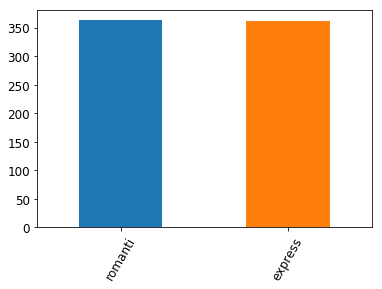

In [26]:
dataframe['movimento'].value_counts().plot(kind='bar', rot=60, fontsize=12)

In [27]:
# dataframe = dataframe[:2048]
X = dataframe.drop(['movimento'], axis=1)
y = dataframe['movimento']

In [28]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,663,664,665,666,667,668,669,670,671,672
389,0.000000,0.0,0.0,0.0,0.0,0.035446,0.000000,0.000000,0.003015,0.000000,...,0.068712,0.028905,0.029418,0.063111,0.00000,0.000000,0.078940,0.072068,0.073168,0.071037
390,0.000000,0.0,0.0,0.0,0.0,0.014832,0.000000,0.065086,0.000110,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.10055,0.110930,0.000000,0.111240,0.000000,0.093423
391,0.028012,0.0,0.0,0.0,0.0,0.046807,0.063297,0.000000,0.000821,0.000000,...,0.071361,0.000000,0.081470,0.000000,0.00000,0.024131,0.080003,0.074847,0.075988,0.000000
392,0.070174,0.0,0.0,0.0,0.0,0.031764,0.074514,0.000000,0.003283,0.073799,...,0.074454,0.000000,0.032387,0.055486,0.06834,0.040541,0.046677,0.060841,0.079282,0.076974
393,0.000000,0.0,0.0,0.0,0.0,0.049398,0.000000,0.000000,0.027625,0.084620,...,0.094112,0.043599,0.000000,0.084345,0.00000,0.000000,0.074703,0.000000,0.100210,0.000000


In [29]:
y.head()

389    express
390    express
391    express
392    express
393    express
Name: movimento, dtype: object

In [30]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [31]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(1024, input_dim=672, activation='relu'))
    model.add(Dense(1024, activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer='tanh', metrics=['accuracy'])
    return model

In [32]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=128, verbose=0)

In [33]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Resultado GIST
* Cubismo - Expressionismo - Romanticismo
    * Baseline: 70.37% (5.49%)
* Cubismo - Realismo - Romanticismo    
    * Baseline: 69.1602% (4.6196%)    
* Cubismo - Expressionismo
    * Baseline: 70.4509% (4.5518%)
* Cubismo - Romantismo
    * Baseline: 86.1789% (4.8159%)
* Expressionismo - Romanticismo    
    * Baseline: 82.3364% (4.5324%)

# Resultado LBP
* Cubismo - Expressionismo - Romanticismo
    * Baseline: 62.48% (5.01%)
* Cubismo - Expressionismo
    * Baseline: 66.0561% (4.1136%)
* Cubismo - Romanticismo
    * Baseline: 80.7158% (5.2132%)
* Expressionismo - Romanticismo
    * Baseline: 79.1743% (3.8280%)

    

# Resultado COLOR

* Cubismo - Expressionismo - Romanticismo
    * Baseline: 68.40% (3.89%)
* Cubismo - Expressionismo    
    * Baseline: 66.4351% (3.6368%)
* Cubismo - Romanticismo
    * Baseline: 89.0860% (4.6963%)
* Expressionismo - Romanticismo
    * Baseline: 89.12% (4.58%)

In [34]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 89.12% (4.58%)
